In [6]:
import glob
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# combines all the netcdf files into 1 file
# searches for all files with .nc4 extension and combines them all into 1 file called august2.nc
ds = xr.open_mfdataset('*.nc4')
ds.to_netcdf('august2.nc')


In [10]:
# the new file with all the files combined
fn = 'august2.nc'
# opening the netcdf files and selecting the specific variables I want
data = xr.open_dataset(fn)
# Soil Moisture
SM = data['SoilMoist_S_tavg']
# Temperature
Temp = data['AvgSurfT_tavg']
# Evapotranspiration
ET = data['Evap_tavg']
# time
time = data['time']

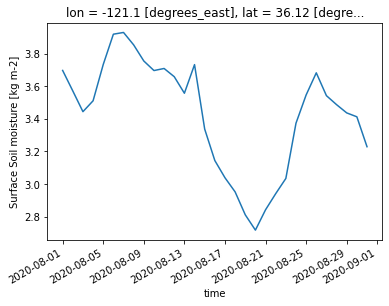

In [11]:
# creating time series of soil moisture values over specific lon and lat values
SM_specific_point = SM.sel(lat=36.125,lon=-121.125)
SM_specific_point.plot()


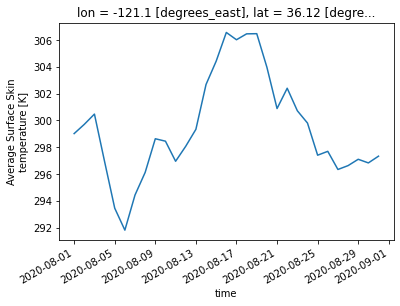

In [12]:
# creating time series of Temperature values over specific lon and lat values (same position as SM time series)
Temp_specific_point = Temp.sel(lat=36.125,lon=-121.125)
Temp_specific_point.plot()

Text(0, 0.5, 'Frequency')

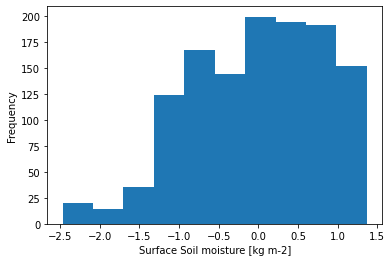

In [20]:
# creating a histogram of soil moisture values
# this histogram has all SM values for all lon/lat values and all days from august 1 2020 to august 31 2020
np.log(SM).plot()
plt.ylabel('Frequency')

Text(0, 0.5, 'SM percentile')

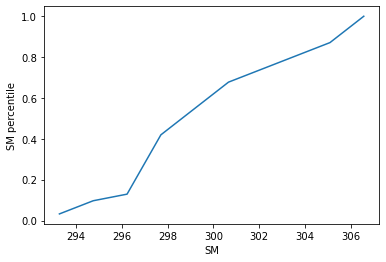

In [19]:
# cdf of temperature at specific point (same as above) for the month of august
count, bins_count = np.histogram(Temp_specific_point, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('SM')
plt.ylabel('SM percentile')

Text(0, 0.5, 'SM percentile')

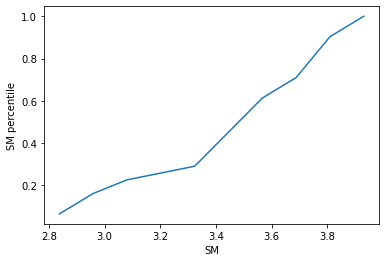

In [18]:
# cdf of SM at specific point (same as above) for the month of august
count, bins_count = np.histogram(SM_specific_point, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel('SM')
plt.ylabel('SM percentile')

Text(0, 0.5, 'SM percentile')

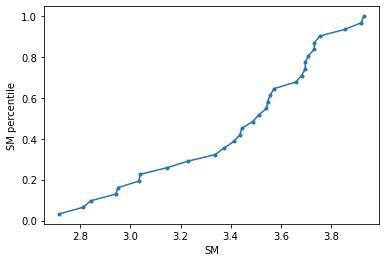

In [16]:
# CDF for Soil Moisture at specific point for the month of August 2020 (another method)
x = np.sort(SM_specific_point)
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.')
plt.xlabel('SM')
plt.ylabel('SM percentile')